In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

In [2]:
# Parámetros
h1 = 164 
L = 119000 
Z_max = -1493 - 164 # Profundidad en Y = -62000
Y_fondo= -62000
Fondo_lineal= -440000
Costa_extra= 20000
L_expansion = 2 * L
DelX = 200
DelY = 200#m
# Calcular nx y ny como enteros
nx_center = int(4 * L / DelX)
ny = int((L + Costa_extra + np.abs(Y_fondo)+ np.abs(Fondo_lineal)) / DelY) #L+ Talud continental +Expansión dominio Y
idx_start_slope=int(440000/DelY)
print(ny)
print(nx_center)

3205
2380


In [3]:
x_min_center = -L_expansion # m
x_max_center =  L_expansion # m
x_min_expand = - 800E3 # m
x_max_expand =  800E3 # m
y_min = -int(np.abs(Y_fondo)+ 440000) # m
y_max = int(119000 + 800) # m
ny_expand= 30

# Crear dominios en las regiones exteriores (-800E3 a -2L y 2L a 800E3) con crecimiento cuadrático
# Aseguramos que el primer incremento sea 200 m usando un factor adecuado 'k'.
k = DelX 

# Crear el vector para la expansión en Y
i_values_y =  np.arange(ny_expand+1)
# Crear el vector para la expansión del lado derecho 
#i_values_x = np.arange(int(np.sqrt((x_max_expand - x_max_center) / k)) + 1)
i_values_x =  np.arange(56)

x_right = x_max_center + (k * i_values_x**2)
y_expand = y_min -(k*i_values_y**2)

# Crear el vector para la expansión del lado izquierdo al reflejar y ordenar
x_left = -np.flip(x_right)
y_expand = np.flip(y_expand) 

# Quitar los valores que se superponen con el centro
x_left = x_left[:-1]
x_right = x_right[1:]
y_expand = y_expand[:-1]
dx_expand = x_right[1:]-x_right[:-1]
dy_expand = y_expand[1:]-y_expand[:-1]

In [4]:
len(x_right)

55

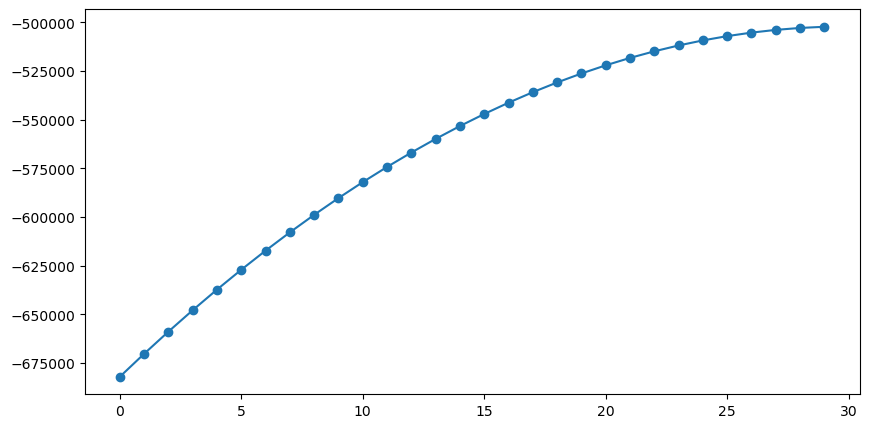

In [5]:

plt.figure(figsize=(10, 5))
plt.plot(y_expand[:], 'o-')
plt.show()

In [6]:

# Crear el dominio con un aumento lineal del delta x hacia los lados
x_center = np.linspace(-L_expansion, L_expansion, nx_center)  # Parte central de la bahía, con espaciado uniforme



In [7]:
# Crear el dominio Y (como antes, con espaciado uniforme)
y_center = np.linspace(Y_fondo + Fondo_lineal, L+Costa_extra, ny)

# Combinar las regiones para formar el dominio completo en Y
y_domain = np.concatenate((y_expand, y_center))

In [8]:

# Crear dominios en las regiones exteriores (-4L a -2L y 2L a 4L) con crecimiento cuadrático
# Aseguramos que el primer incremento sea 20 m usando un factor adecuado 'k'.
#k = DelX # Ajustamos k para que el primer incremento sea 20 m

#x_right = [] #Creamos la lista vacia

# Rellenar la región derecha (2L a 4L)
#x_val = 2 * L
#i = 1 #Empezamos con 1
#while x_val < 8 * L: #Agremamos los valores a lista hasta que lleguemos al 4L
#    x_right.append(x_val) #agregamos
#    x_val += k * i**2 #Sumanos 20*(x^2)m
#    i += 1
    
#x_right=np.array(x_right) #convertimos la lista en arreglo
#Una vez que tenemos nuestra expanción del lado derecho,
#la expanción del lado izquierdo multiplicando por -1 el arreglo derecho
#x_left=np.sort(-x_right) 


#Como el primer y ultimo valor x_center es +-238000 m
#quitamos este valor de nuestro dominio expandido a los lados
#x_left=x_left[:-1]
#x_right=x_right[1:]


# Combinar todas las regiones para formar el dominio completo en X
x_domain = np.concatenate((x_left, x_center, x_right))


# Imprimir el dominio X para revisión
print(x_domain)

[-843000. -821200. -799800. ...  799800.  821200.  843000.]


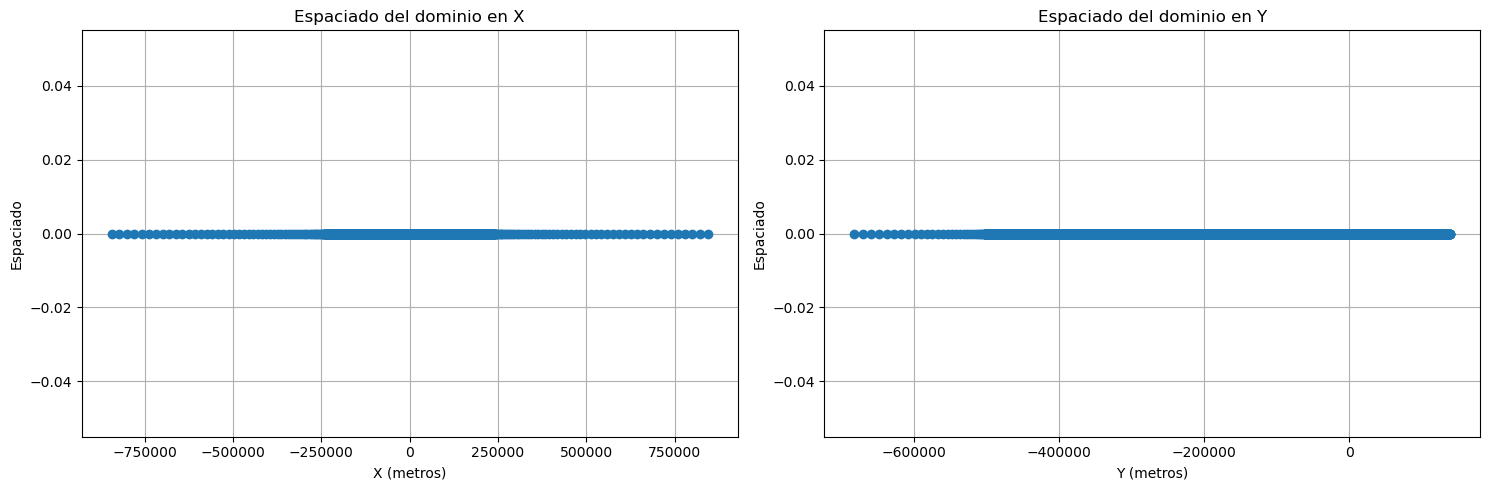

In [9]:
# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Espaciado en el eje X
ax1.plot(x_domain, np.zeros_like(x_domain), 'o-')
ax1.set_title("Espaciado del dominio en X")
ax1.set_xlabel("X (metros)")
ax1.set_ylabel("Espaciado")
ax1.grid(True)

# Subplot 2: Espaciado en el eje Y
ax2.plot(y_domain, np.zeros_like(y_domain), 'o-')
ax2.set_title("Espaciado del dominio en Y")
ax2.set_xlabel("Y (metros)")
ax2.set_ylabel("Espaciado")
ax2.grid(True)

# Mostrar el gráfico
plt.tight_layout()

In [10]:

# Crear el dominio Y (como antes, con espaciado uniforme)
#y_domain = np.linspace(Y_fondo, 3*L, ny)
X_domain, Y_domain = np.meshgrid(x_domain, y_domain)
Z_domain = np.zeros_like(X_domain)  # Inicializar Z con ceros


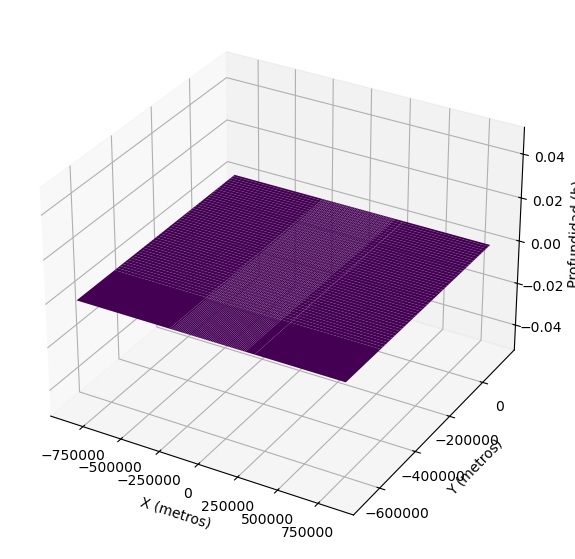

In [11]:
# Graficar el dominio
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_domain, cmap='viridis')
#ax.plot(X[] color='red', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

In [12]:
Idx_bahia_start=ny_expand+int(np.abs(Y_fondo + Fondo_lineal)/DelY)-1 #
Idx_slope_start= ny_expand+int(np.abs(Fondo_lineal)/DelY)-1 #y_domain[Idx_slope_start]=-62058.4942084942

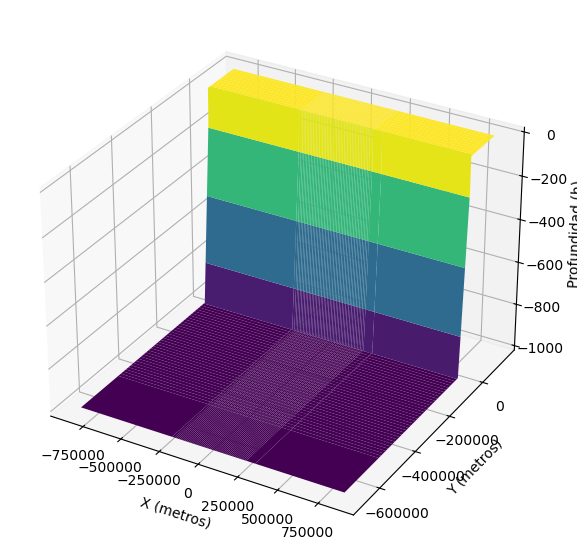

In [13]:
#Como cambiamos de la resolución de DelY de 20 a 200 m modificaremos el código
#Y_idx_start_bahia= 3110+8900 #Y_domain[3100,0]=6.851585810589313  a:
#Y_idx_start_bahia= 311+800 #Y_domain[3100,0]=6.851585810589313
#Y_idx_end_bahia= 

Z_domain[:Idx_slope_start+1,:]=-1000

# --- Agregar pendiente en la región Z[:Y_idx_start_bahia-1, :] ---
# Interpolar pendiente entre Z[0,:] = Z_max y Z[Y_idx_start_bahia-1,:] = -h1
Y_slope = np.linspace(Z_max, -h1, Idx_bahia_start+1-Idx_slope_start)


# Asignar la pendiente a toda la región en el eje X
Z_domain[Idx_slope_start:Idx_bahia_start+1, :] = np.tile(Y_slope[:, None], (1, len(x_domain)))


# Aplicar un filtro gaussiano para suavizar las transiciones
Z_smooth = gaussian_filter(Z_domain, sigma=5)

# Cortar a 1000 m de profundidad
Z_domain_crop = np.where(Z_smooth>=-1000, Z_domain, -1000)

# Graficar el sólido de revolución con la bahía y la pendiente
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Usar plot_surface para graficar la superficie
ax.plot_surface(X_domain, Y_domain, Z_domain_crop, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X (metros)')
ax.set_ylabel('Y (metros)')
ax.set_zlabel('Profundidad (h)')

plt.show()

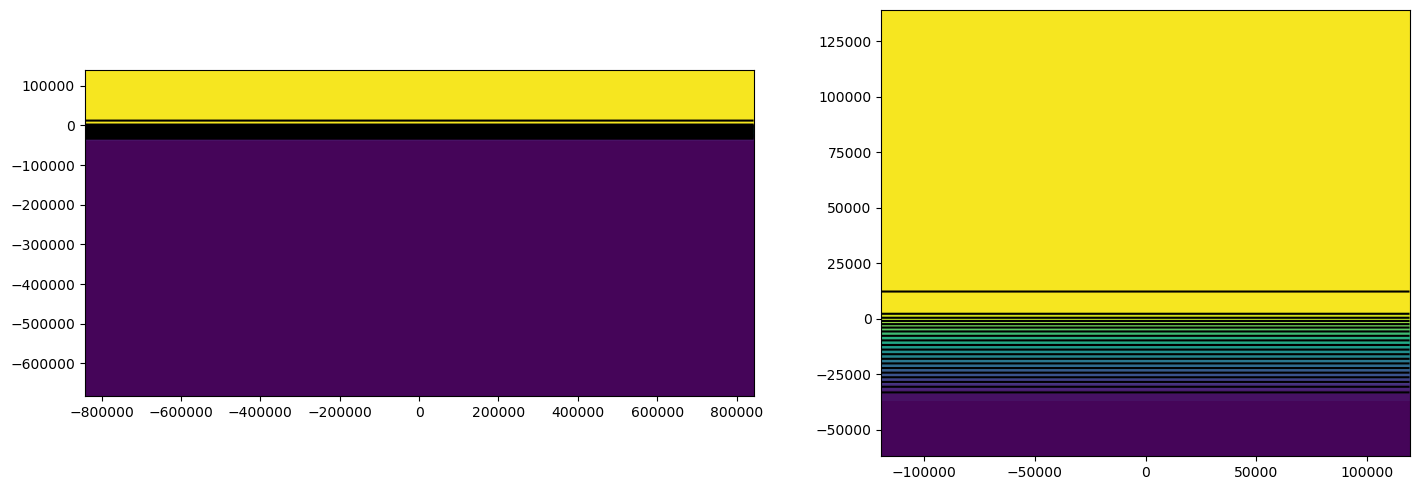

In [14]:
x_new=1190 #bahia_01_expand_true.ipynb
Z_bahia = 595
X_idx_start_bahia=int(L/DelX)+len(x_left)
X_idx_end = int(L/DelX) + x_new+len(x_left)
#Y_idx_start_bahia= 311+890 #Y_domain[3100,0]=6.851585810589313
Y_idx_end_bahia= Z_bahia + Idx_bahia_start

# Aplicar un filtro gaussiano para suavizar las transiciones
Z_smooth = gaussian_filter(Z_domain_crop, sigma=15)

# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Espaciado en el eje X
ax1.contourf(X_domain, 
            Y_domain,
            Z_smooth,33, cmap='viridis')
ax1.contour(X_domain, 
            Y_domain,
            -Z_smooth,levels=np.arange(0,1600,50),colors='k')

ax1.set_aspect(1)

# Subplot 2: Espaciado en el eje Y
ax2.contourf(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            Z_smooth[Idx_slope_start:,X_idx_start_bahia:X_idx_end],33, cmap='viridis')
ax2.contour(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            -Z_smooth[Idx_slope_start:,X_idx_start_bahia:X_idx_end],levels=np.arange(0,1600,50),colors='k')

ax2.set_aspect(1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



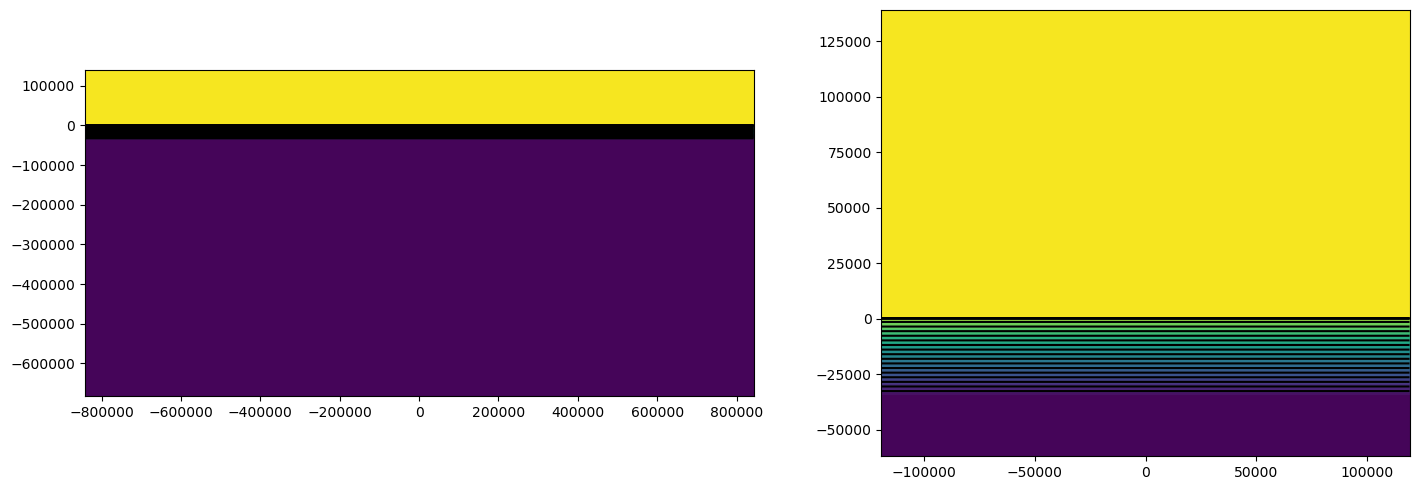

In [15]:
# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Espaciado en el eje X
ax1.contourf(X_domain, 
            Y_domain,
            Z_domain_crop,33, cmap='viridis')
ax1.contour(X_domain, 
            Y_domain,
            -Z_domain_crop,levels=np.arange(0,1600,50),colors='k')

ax1.set_aspect(1)

# Subplot 2: Espaciado en el eje Y
ax2.contourf(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            Z_domain_crop[Idx_slope_start:,X_idx_start_bahia:X_idx_end],33, cmap='viridis')
ax2.contour(X_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end], 
            Y_domain[Idx_slope_start:,X_idx_start_bahia:X_idx_end],
            -Z_domain_crop[Idx_slope_start:,X_idx_start_bahia:X_idx_end],levels=np.arange(0,1600,50),colors='k')

ax2.set_aspect(1)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [16]:
# Cortar a 1000 m de profundidad
#Z_smooth_crop = np.where(Z_smooth>=-1000, Z_smooth, -1000)
#Z_domain_crop = np.where(Z_domain>=-1000, Z_domain, -1000)

#np.shape(Z_smooth_crop)

In [17]:
# Salvar versión con 10 veces menos puntos
X = X_domain#[::10,::10]
Y = Y_domain#[::10,::10]
Z = Z_domain_crop#[:10,::10]
Z_sm = Z_smooth#[::10,::10]

import netCDF4 as nc
import numpy as np

# Crear el archivo NetCDF
filename = 'nobahia01_expand_bat.nc'
bahia = nc.Dataset(filename, 'w', format='NETCDF4')

# Definir las dimensiones
nx = X.shape[1]
ny = Y.shape[0]

bahia.createDimension('x', nx)
bahia.createDimension('y', ny)

# Crear las variables en el archivo NetCDF
x_var = bahia.createVariable('X', np.float32, ('y', 'x'))
y_var = bahia.createVariable('Y', np.float32, ('y', 'x'))
z_var = bahia.createVariable('Z', np.float32, ('y', 'x'))
z_smooth_var = bahia.createVariable('Z_sm', np.float32, ('y', 'x'))

# Agregar atributos a las variables (opcional)
x_var.units = 'meters'
y_var.units = 'meters'
z_var.units = 'meters'
z_smooth_var.units = 'meters'

x_var.description = 'Coordenadas X del dominio'
y_var.description = 'Coordenadas Y del dominio'
z_var.description = 'Datos de profundidad del dominio Z'
z_smooth_var.description = 'Datos suavizados de profundidad del dominio Z'

# Asignar los datos a las variables
x_var[:, :] = X
y_var[:, :] = Y
z_var[:, :] = Z
z_smooth_var[:, :] = Z_sm

# Cerrar el archivo para guardar los cambios
bahia.close()

print(f"Datos guardados exitosamente en {filename}")


Datos guardados exitosamente en nobahia01_expand_bat.nc


In [18]:
total_depth = 1000
nz = 40
dz = np.zeros(nz)
dz[0] = 2 # m
factor = 1.1045
for ii in range(1,nz):
    dz[ii] = dz[ii-1]*factor

1000.7258347279098


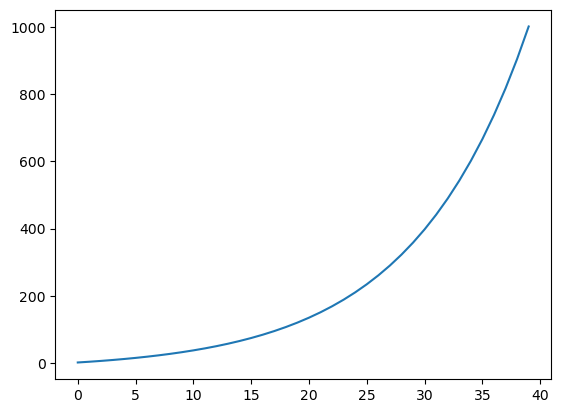

In [19]:
z_levels = np.cumsum(dz)
plt.plot(z_levels)
print(z_levels[-1])

In [20]:
# Copy this into data file
# These are the cell thicknesess - 164
zlevels_MIT = z_levels
zlevels_MIT[-1] = 1000 # Make the last level be at H

for dzii, ii in zip(np.round(dz, decimals=1), range(len(dz))):
    print(f'{dzii},', end=" ")
    if ii!=0 and ii%9 == 0:
        print('')

2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 4.0, 4.4, 4.9, 
5.4, 6.0, 6.6, 7.3, 8.0, 8.9, 9.8, 10.8, 12.0, 
13.2, 14.6, 16.1, 17.8, 19.7, 21.7, 24.0, 26.5, 29.3, 
32.3, 35.7, 39.4, 43.6, 48.1, 53.1, 58.7, 64.8, 71.6, 
79.1, 87.4, 96.5, 

Remove 0.24 m from last two levels to make it fit into 1000 m

In [21]:
dz[-2]=dz[-2]-0.24
dz[-1]=dz[-1]-0.24

np.cumsum(np.round(dz, decimals=1))

array([   2. ,    4.2,    6.6,    9.3,   12.3,   15.6,   19.2,   23.2,
         27.6,   32.5,   37.9,   43.9,   50.5,   57.8,   65.8,   74.7,
         84.5,   95.3,  107.3,  120.5,  135.1,  151.2,  169. ,  188.7,
        210.4,  234.4,  260.9,  290.2,  322.5,  358.2,  397.6,  441.2,
        489.3,  542.4,  601.1,  665.9,  737.5,  816.6,  903.7, 1000. ])

In [22]:
for dzii, ii in zip(np.round(dz, decimals=1), range(len(dz))):
    print(f'{dzii},', end=" ")
    if ii!=0 and ii%8 == 0:
        print('')

2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 4.0, 4.4, 
4.9, 5.4, 6.0, 6.6, 7.3, 8.0, 8.9, 9.8, 
10.8, 12.0, 13.2, 14.6, 16.1, 17.8, 19.7, 21.7, 
24.0, 26.5, 29.3, 32.3, 35.7, 39.4, 43.6, 48.1, 
53.1, 58.7, 64.8, 71.6, 79.1, 87.1, 96.3, 

Copy this array into mitgcm data namelist, variable delR.